<a href="https://colab.research.google.com/github/panghanwu/scikit-learning_tutorial_Elwing/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

pd.options.display.max_rows = 20
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x , y = df.drop(['target'], axis=1), df['target']  # drop不會覆寫回DataFrame
x, y = np.array(x), np.array(y)

# train_test_split([1,2,3,4], [5,6,7,8], test_size=0.25, random_state=5)  # for test
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.1)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)  # 創造方法 
reg.fit(x_train, y_train) # fit: 學習

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

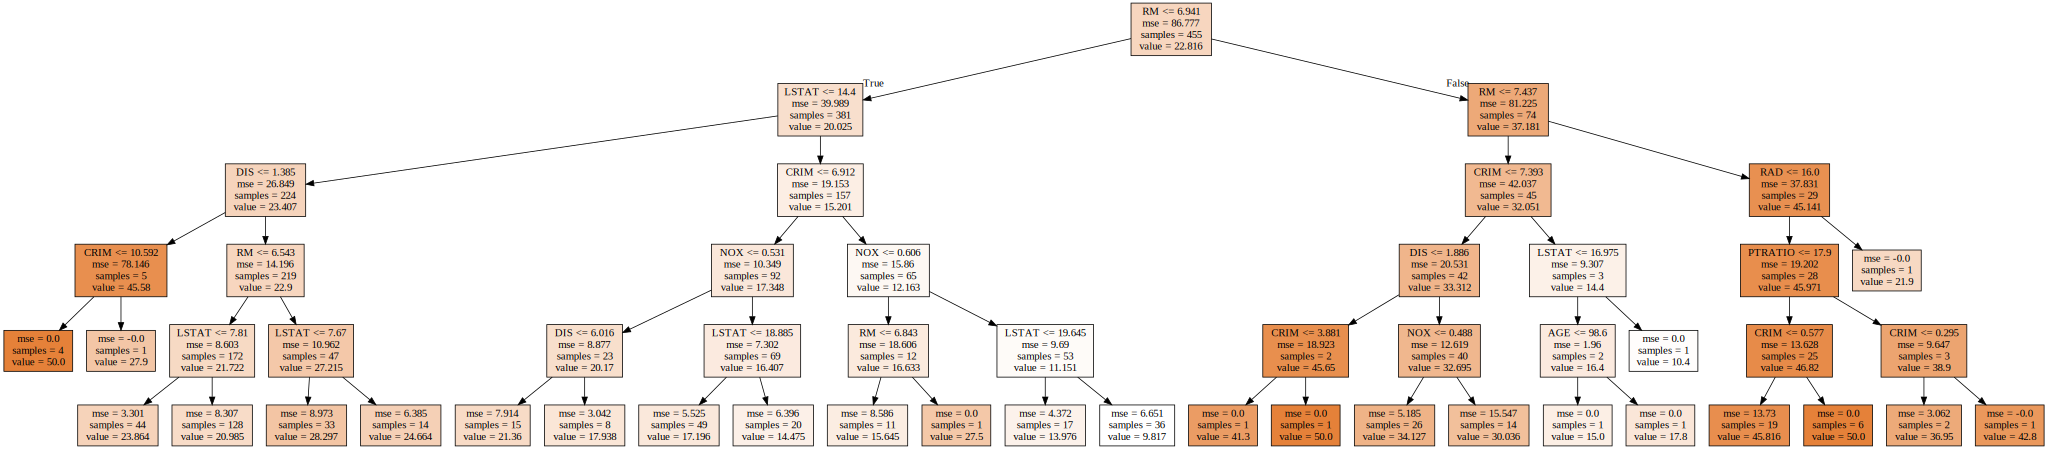

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg, 
           feature_names=boston['feature_names'],
           filled=True)
graphviz.Source(g)

In [ ]:
pre = reg.predict(x_test)
pre

array([ 9.81666667, 20.98515625, 13.97647059,  9.81666667, 20.98515625,
       28.2969697 , 17.19591837, 20.98515625,  9.81666667, 14.475     ,
       20.98515625,  9.81666667, 28.2969697 , 28.2969697 , 20.98515625,
       14.475     , 20.98515625, 20.98515625, 13.97647059, 23.86363636,
        9.81666667, 24.66428571,  9.81666667, 21.36      , 20.98515625,
       34.12692308, 17.19591837, 20.98515625, 20.98515625, 20.98515625,
       14.475     , 24.66428571,  9.81666667, 17.19591837, 20.98515625,
       20.98515625, 28.2969697 , 20.98515625, 20.98515625, 28.2969697 ,
       20.98515625, 20.98515625, 14.475     , 23.86363636, 23.86363636,
        9.81666667, 20.98515625, 23.86363636, 20.98515625, 36.95      ,
       28.2969697 ])

相較於MAE  
RMSE對於變異數或誤差更敏感

$a = \frac{1}n \sum (predict-element)^2$  
$b = \frac{1}n \sum (average-element)^2$  
$r_2 = \frac{a}b$  

**a**: 預測的MSE, **b**: 隨便瞎猜的MSE

In [ ]:
from sklearn.metrics import r2_score
r2_score(pre, y_test)

0.7713141824595708